In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
weather=pd.read_csv(r'C:\Users\Vinh Hoa Tu\Downloads/london_weather123.csv')
print(weather.head())
print(weather.info())
sunshine=weather[['date', 'sunshine']]
print(sunshine)

       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341

In [3]:
sunshine['date']=sunshine['date'].astype(str)
sd = sunshine[sunshine['date'].str.endswith(('01','15'))] # only keep date 01 and 15
sd= sd.reset_index() #reset the indice of dataframe
sd=sd.drop('index',axis=1)

C:\Users\Vinh Hoa Tu\AppData\Local\Temp\ipykernel_8412\461779359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunshine['date']=sunshine['date'].astype(str)


In [4]:
sd

,date,sunshine
0,19790101,7.0
1,19790115,0.0
2,19790201,0.0
3,19790215,0.0
4,19790301,6.4
...,...,...
1003,20201015,2.7
1004,20201101,0.7
1005,20201115,0.7
1006,20201201,1.0


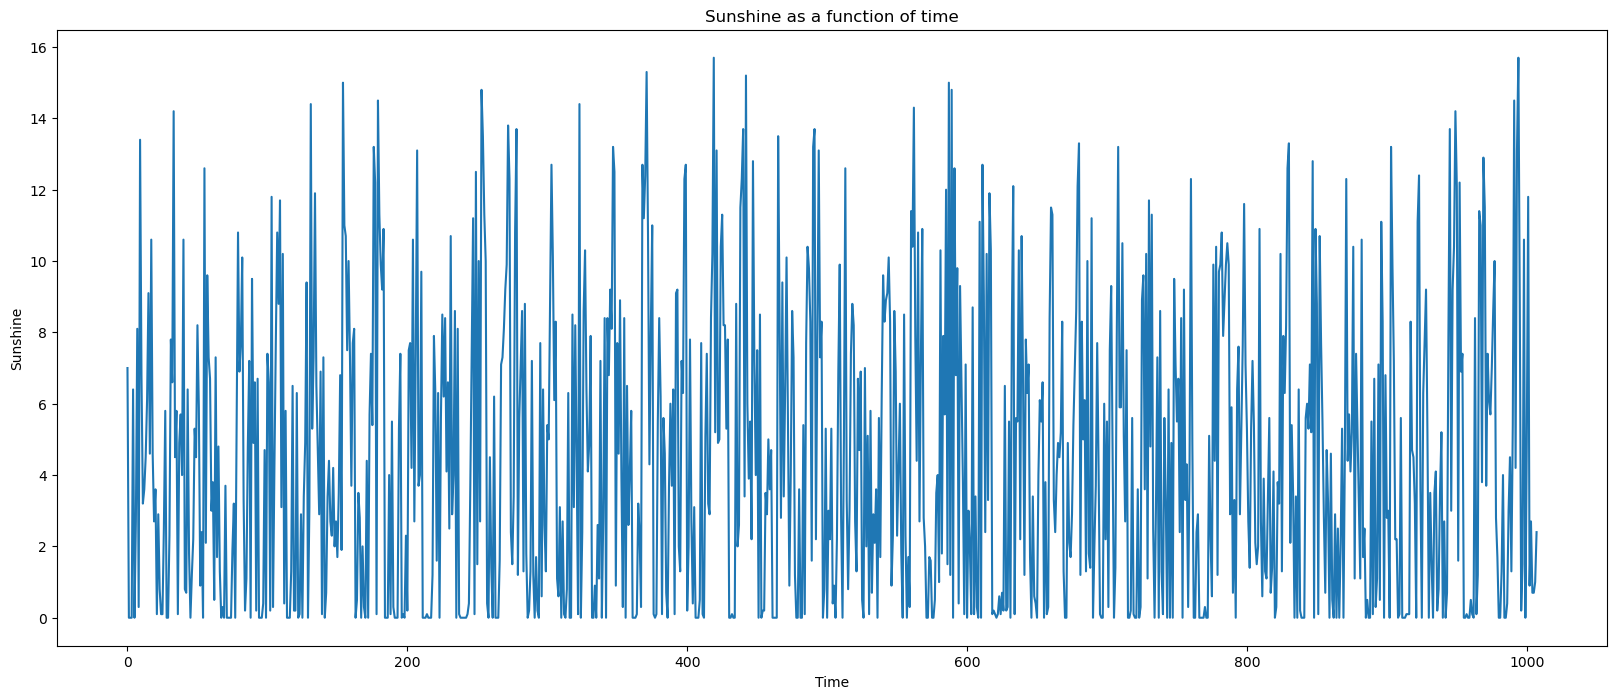

In [5]:
#show sd
plt.figure(figsize=(20,8))
plt.plot(sd['sunshine'])
plt.title('Sunshine as a function of time')
plt.xlabel('Time')
plt.ylabel('Sunshine')
plt.show()

In [6]:
mean=sd['sunshine'].mean()
variance=sd['sunshine'].var()
print(f'Moyenne : {mean}, Variance :{variance}')

Moyenne : 4.454265873015872, Variance :16.95326877531872


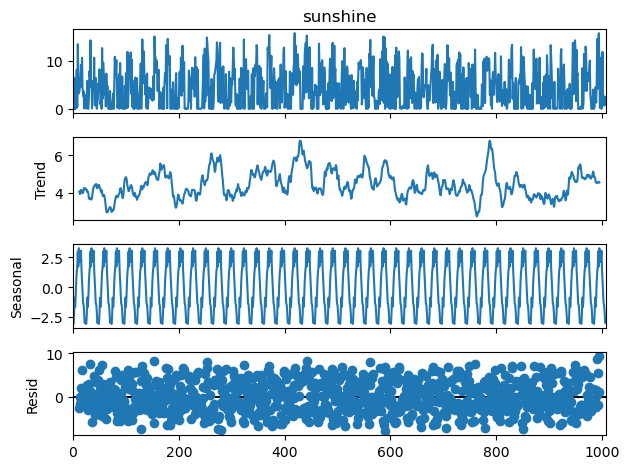

In [7]:
#decompose the serie into trend, seasonal, residual and stationary serie
from statsmodels.tsa.seasonal import seasonal_decompose
result= seasonal_decompose(sd['sunshine'], model='additive',period=24)
result.plot()
plt.show()

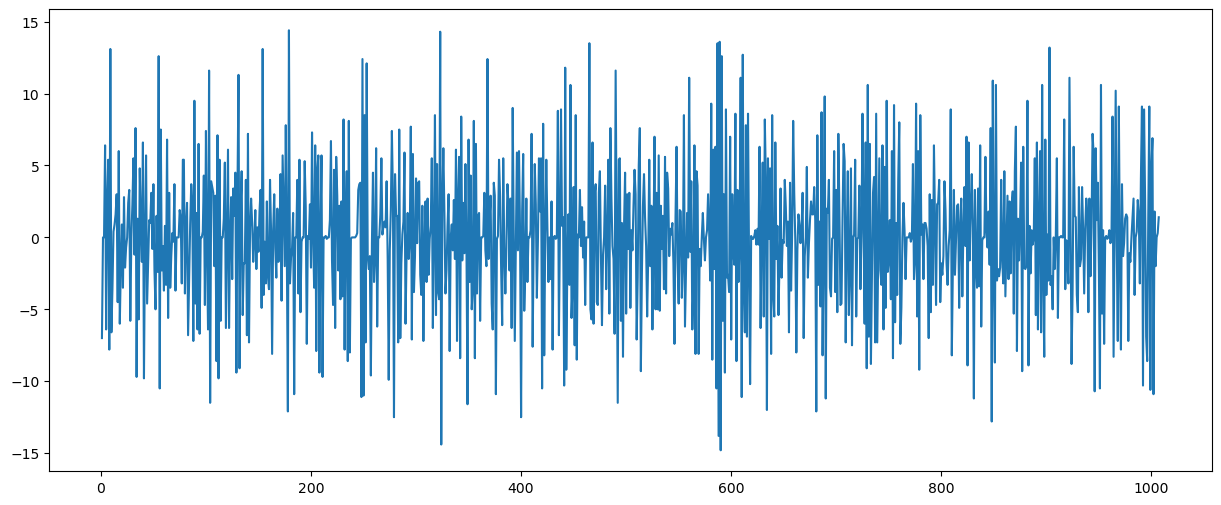

In [8]:
plt.figure(figsize=(15,6))
plt.plot(sd['sunshine'].diff()) # remove trend and season of sunshine by differencing 
stationnarized=sd['sunshine'].diff()

In [9]:
#Augmented Dickey-Fuller Test to test the stationarity of (Xt)
from statsmodels.tsa.stattools import adfuller
adfuller(sd['sunshine'])


result = adfuller(sd['sunshine'])

# Extracting and printing the results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value <= 0.05:
    print("The null hypothesis (non-stationarity) can be rejected. The time series appears to be stationary.")
else:
    print("The null hypothesis cannot be rejected. The time series")

ADF Statistic: -7.157973427955217
p-value: 3.019711565769702e-10
Critical Values:
   1%: -3.4370062675076807
   5%: -2.8644787205542492
   10%: -2.568334722615888
The null hypothesis (non-stationarity) can be rejected. The time series appears to be stationary.


In [10]:
stationnarized=stationnarized.dropna()

In [11]:
stationnarized

1      -7.0
2       0.0
3       0.0
4       6.4
5      -6.4
       ... 
1003    1.8
1004   -2.0
1005    0.0
1006    0.3
1007    1.4
Name: sunshine, Length: 1007, dtype: float64

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

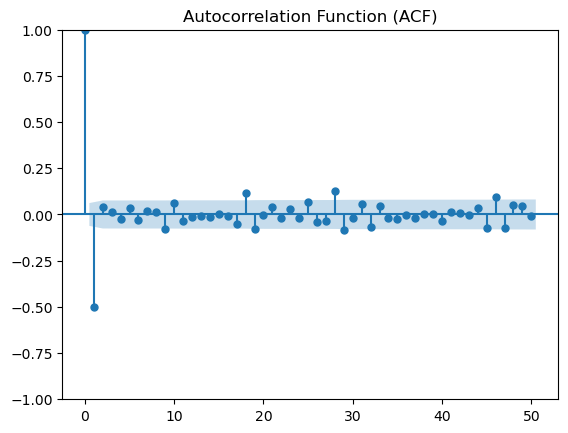

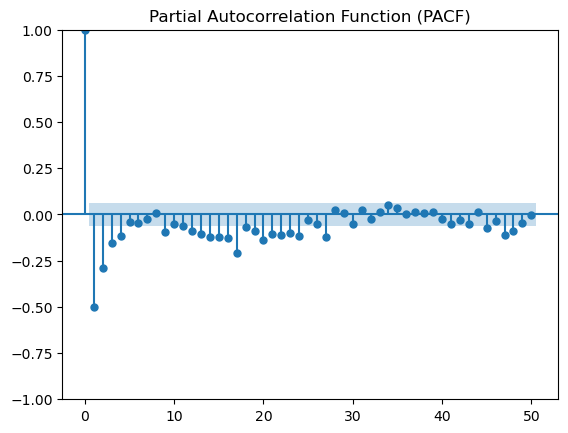

In [12]:
#ACF and PACF

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# PLot ACF
plot_acf(stationnarized, lags=50)
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(stationnarized, lags=(50))
plt.title('Partial Autocorrelation Function (PACF)')



MODEL AR


In [13]:
# train AR(27) model, lag=27 in summary AutoReg(27)

from statsmodels.tsa.ar_model import AutoReg
train_data = stationnarized[:len(stationnarized)-10]
test_data = stationnarized[len(stationnarized)-10:]
ar_model = AutoReg(train_data, lags=27).fit()
print(ar_model.summary())


                            AutoReg Model Results                             
Dep. Variable:               sunshine   No. Observations:                  997
Model:                    AutoReg(27)   Log Likelihood               -2643.467
Method:               Conditional MLE   S.D. of innovations              3.692
Date:                Tue, 20 Feb 2024   AIC                           5344.934
Time:                        13:51:46   BIC                           5486.376
Sample:                            27   HQIC                          5398.771
                                  997                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0064      0.119      0.054      0.957      -0.226       0.239
sunshine.L1     -0.9087      0.032    -28.530      0.000      -0.971      -0.846
sunshine.L2     -0.7916      0.043    -18.43

C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
# prediction
predict= ar_model.predict(start= len(train_data)+1, end=len(stationnarized),dynamic=False)

C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Text(0.5, 1.0, 'Serie with the last 10% of value highlighted in red')

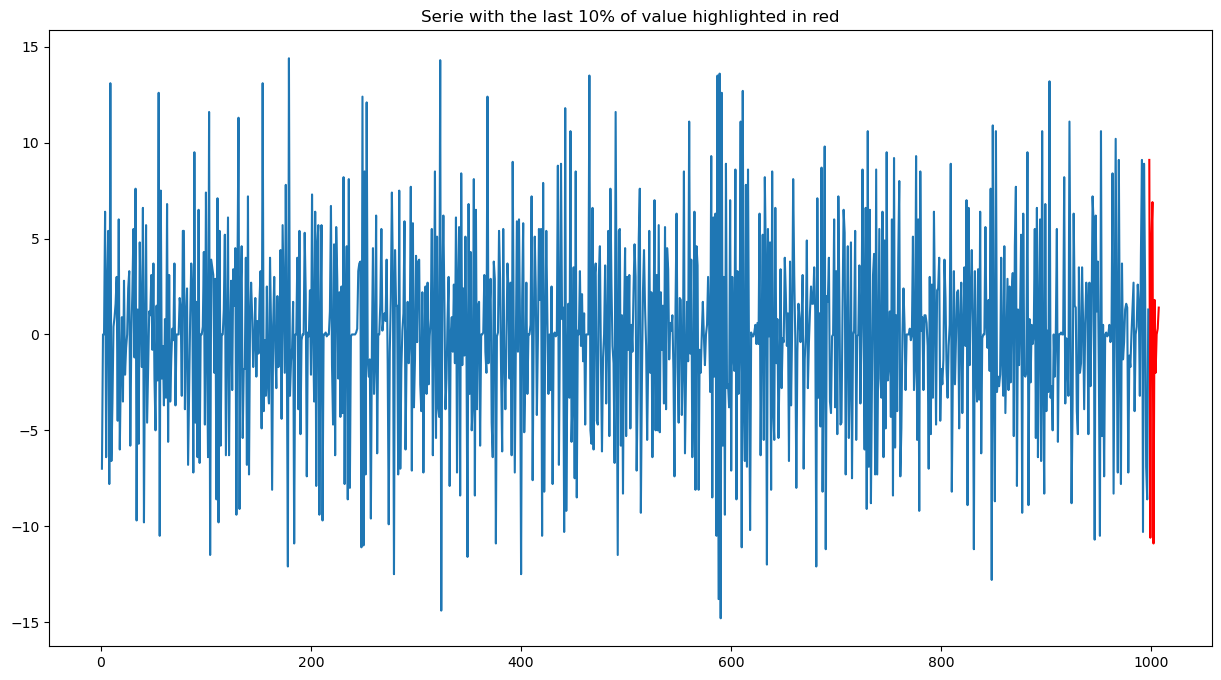

In [15]:
# ploting the serie with the last 10% of value highlighted in red
plt.figure(figsize=(15,8))
plt.plot(test_data, color='red')
plt.plot(stationnarized[:len(stationnarized)-10])
plt.title('Serie with the last 10% of value highlighted in red')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


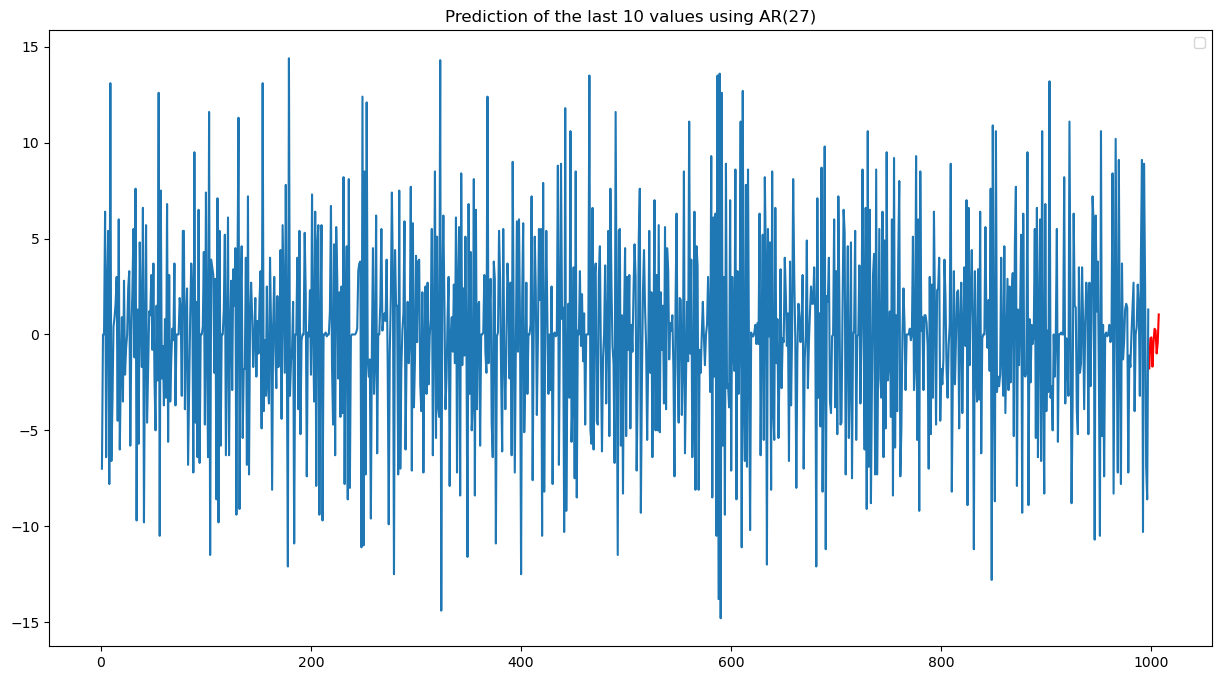

In [16]:
#prediction with AR model
plt.figure(figsize=(15,8))
plt.plot(predict, color='red')
plt.plot(stationnarized[:len(stationnarized)-10])
plt.title('Prediction of the last 10 values using AR(27)')
plt.legend()

Text(0.5, 1.0, 'Prediction of the last 10 values using AR(27)')

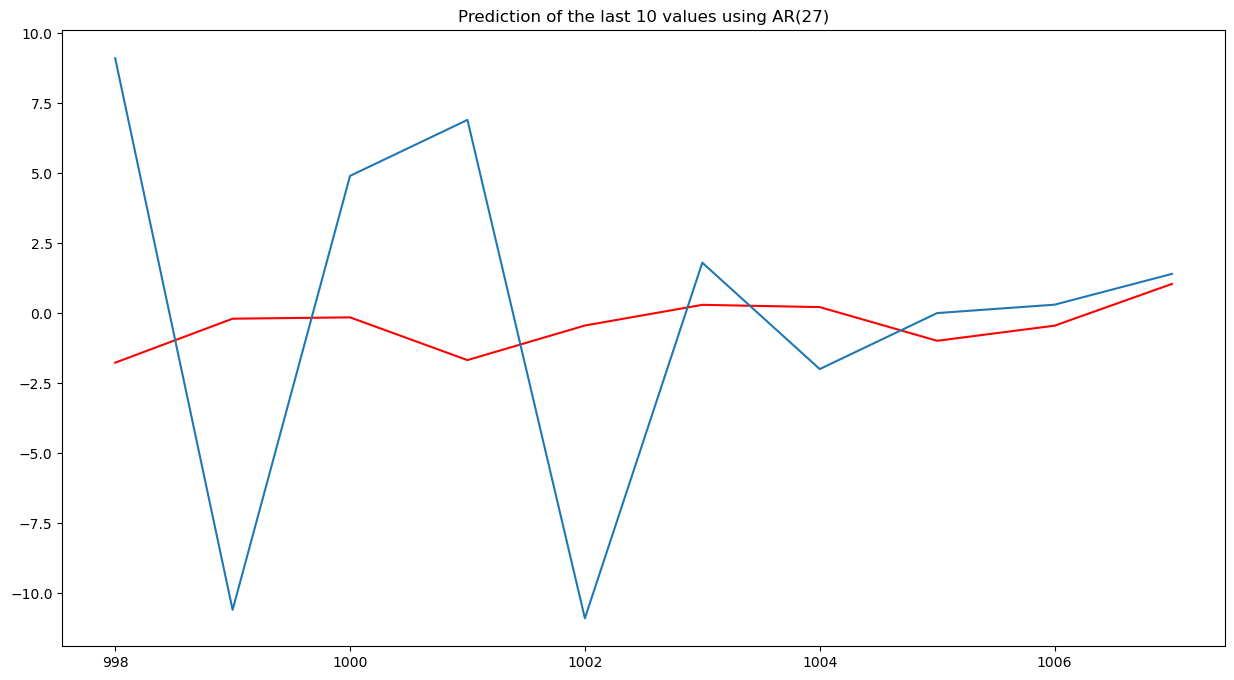

In [17]:
# ploting test_data and prediction using AR(27) modele
plt.figure(figsize=(15,8))
plt.plot(predict, color='red')
plt.plot(test_data)
plt.title('Prediction of the last 10 values using AR(27)')

Text(0.5, 1.0, 'ACF of standardized residuals')

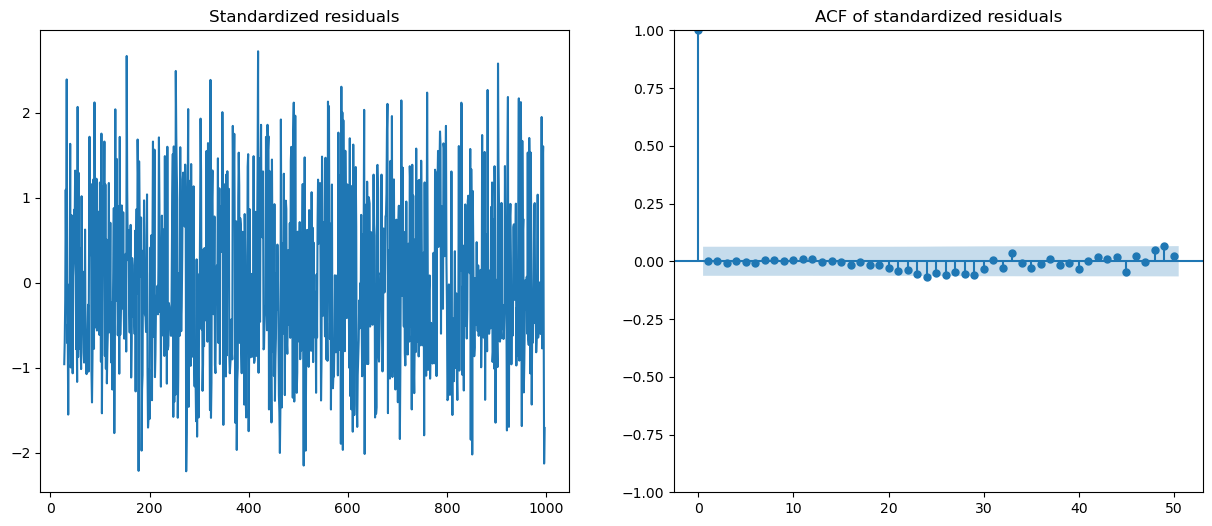

In [18]:
# residuals of model AR after training
residuals = ar_model.resid

# standadized residuals
std_residuals = residuals / np.std(residuals)


#plot
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Standardized residuals
axs[0].plot(std_residuals)
axs[0].set_title('Standardized residuals')

# Plot 2: ACF of standardized residuals
plot_acf(std_residuals, lags=50, ax=axs[1])  # Pass the ax object to plot_acf
axs[1].set_title('ACF of standardized residuals')

In [19]:
#Using Ljung-box to determine the confidence of the non-hypothesis
import statsmodels.api as sm

df= sm.stats.acorr_ljungbox(residuals, lags=20)
df1=pd.DataFrame(df,columns=['lb_pvalue'])

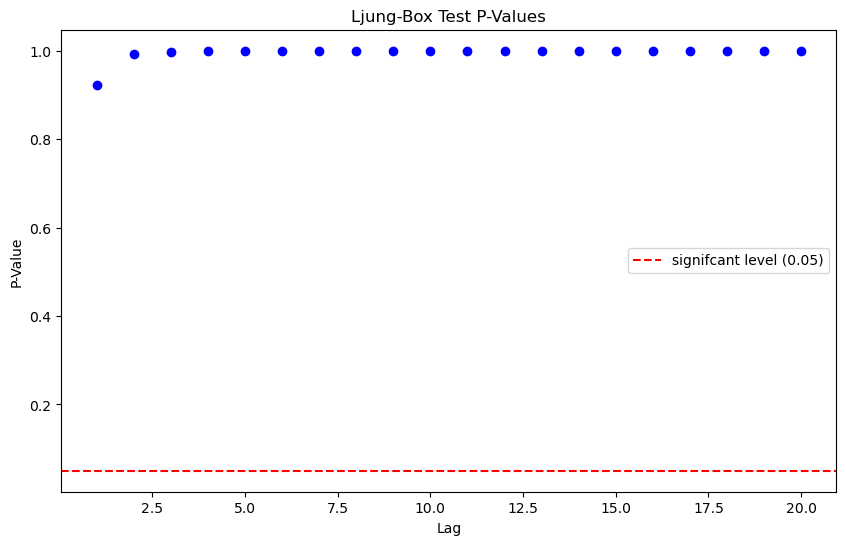

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,21), df1, marker='o', linestyle='', color='b')
plt.axhline(y=0.05, color='r', linestyle='--', label='signifcant level (0.05)')
plt.title('Ljung-Box Test P-Values')
plt.xlabel('Lag')
plt.ylabel('P-Value')
plt.legend()
plt.show()

MODEL MA


In [21]:
MA2_model = sm.tsa.ARIMA(train_data, order=(0, 0, 1))
MA2_result = MA2_model.fit()
print(MA2_result.summary())

                               SARIMAX Results                                
Dep. Variable:               sunshine   No. Observations:                  997
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2830.422
Date:                Tue, 20 Feb 2024   AIC                           5666.845
Time:                        13:51:50   BIC                           5681.559
Sample:                             0   HQIC                          5672.438
                                - 997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.041      0.055      0.956      -0.079       0.083
ma.L1         -0.7133      0.023    -30.766      0.000      -0.759      -0.668
sigma2        17.1035      0.916     18.679      0.0

C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
theta1_estimated = MA2_result.params[1]
print(f'Theta1 Estimated: {theta1_estimated}')

Theta1 Estimated: -0.7133044269647227


In [23]:
# calculate residuals of MA(1)
residuals = MA2_result.resid
print(residuals)

1     -7.002271
2     -3.312677
3     -2.019160
4      5.057333
5     -2.917801
         ...   
993    7.360442
994    7.847965
995   -1.304283
996   -9.532622
997   -5.501933
Length: 997, dtype: float64


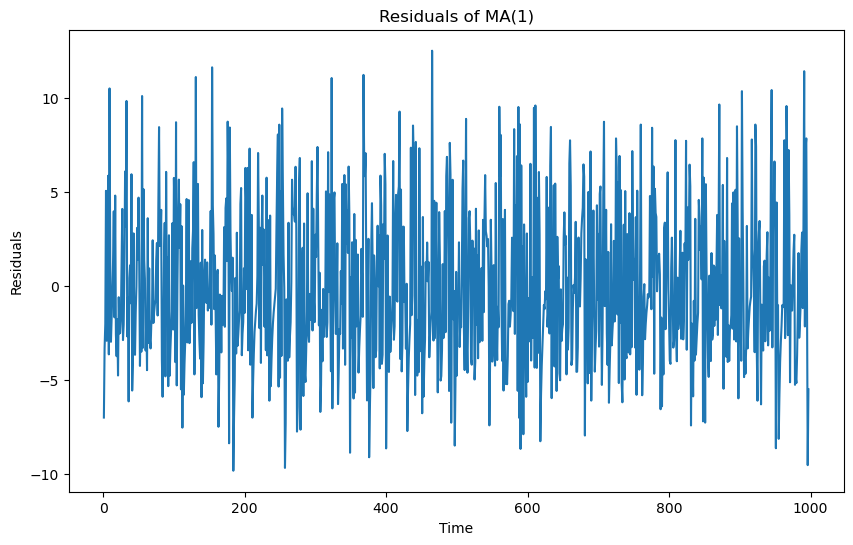

In [24]:
#plot residuals of MA(1)
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of MA(1)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

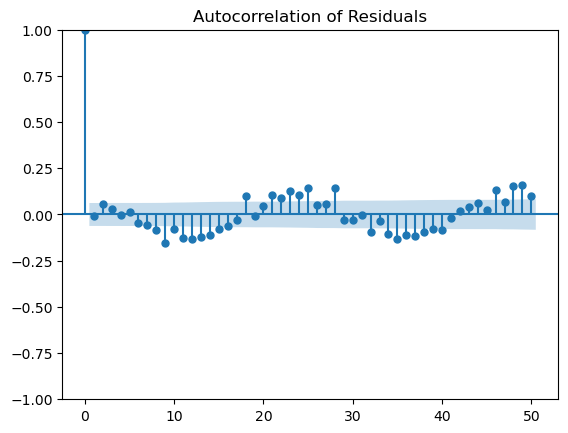

In [25]:
#Autocorrelation of Residuals

plot_acf(residuals, lags=50)
plt.title('Autocorrelation of Residuals')
plt.show()

In [26]:
df= sm.stats.acorr_ljungbox(residuals, lags=20)
df1=pd.DataFrame(df,columns=['lb_pvalue'])
print(df1)

       lb_pvalue
1   7.844556e-01
2   2.232239e-01
3   2.664030e-01
4   4.121621e-01
5   5.232815e-01
6   3.625465e-01
7   2.113106e-01
8   3.617141e-02
9   8.402715e-06
10  1.635568e-06
11  3.027469e-09
12  4.043886e-12
13  1.590007e-14
14  2.111867e-16
15  4.112231e-17
16  2.209168e-17
17  3.893065e-17
18  1.336235e-18
19  3.468509e-18
20  3.873959e-18


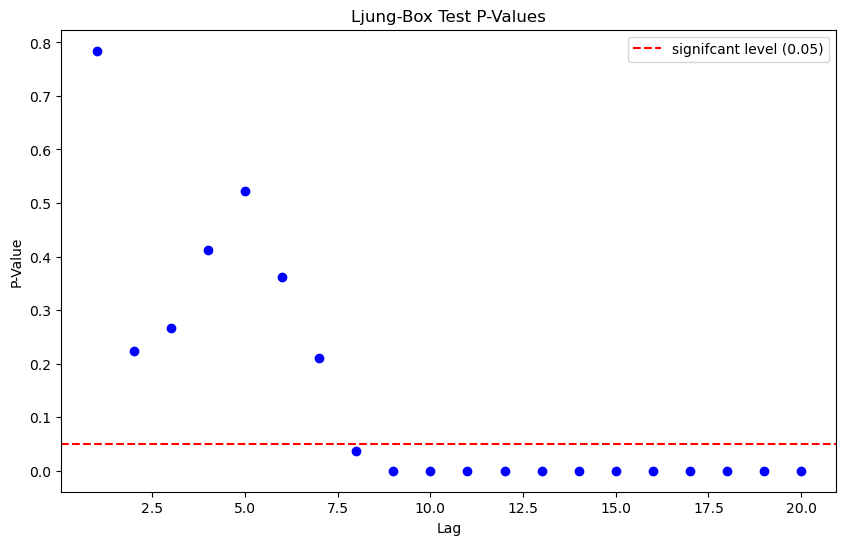

In [27]:
#Ljung-Box
plt.figure(figsize=(10, 6))
plt.plot(range(1,21),df1,marker='o', linestyle='', color='b')
plt.axhline(y=0.05, color='r', linestyle='--', label='signifcant level (0.05)')
plt.title('Ljung-Box Test P-Values')
plt.xlabel('Lag')
plt.ylabel('P-Value')
plt.legend()
plt.show()

In [28]:
MA2_model=sm.tsa.ARIMA(train_data,order=(0,0,1))
MA2_result=MA2_model.fit()
predict= MA2_result.predict(start= len(train_data)+1, end=len(stationnarized),dynamic=False)
print(predict)

998     0.002271
999     0.002271
1000    0.002271
1001    0.002271
1002    0.002271
1003    0.002271
1004    0.002271
1005    0.002271
1006    0.002271
1007    0.002271
Name: predicted_mean, dtype: float64


C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is

MODEL  ARMA


In [29]:
# calculate the table of AIC value of different orders with p<=4 and q<=2
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm


# Extract the relevant column from your dataset (replace 'column_name' with the actual column name)
data = stationnarized

dfs = []

# Create a table to store the results
results_table = pd.DataFrame(columns=['p', 'q', 'AIC'])

# Choose values for p and q
p_values = range(0, 5)  # Adjust the range based on your needs
q_values = range(0, 3)  # Adjust the range based on your needs

# Iteration over different combinations of p and q
for p in tqdm(p_values, desc='Progress'):
    for q in q_values:
        order = (p, 0, q)  # Use (p, d, q) with d=0 for stationary time series
        try:
            # Fit the ARIMA model
            model = ARIMA(data, order=order)
            results = model.fit()

            # Save the results in the table
            df_result = pd.DataFrame({'p': [p], 'q': [q], 'AIC': [results.aic]})
            
            dfs.append(df_result)
        except Exception as e:
            print(f"ARIMA({p}, 0, {q}) model did not converge. Error: {e}")
            continue

results_table = pd.concat(dfs, ignore_index=True)
# Display the results table
print(results_table)

Progress:   0%|          | 0/5 [00:00<?, ?it/s]C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsu

    p  q          AIC
0   0  0  6148.778971
1   0  1  5724.604232
2   0  2  5726.068183
3   1  0  5856.505092
4   1  1  5725.932559
5   1  2  5727.591097
6   2  0  5770.934349
7   2  1  5632.552624
8   2  2  5729.930006
9   3  0  5748.414719
10  3  1  5623.780821
11  3  2  5636.659032
12  4  0  5737.070023
13  4  1  5625.620522
14  4  2  5626.609249


In [30]:
# calculate the table of BIC value of different orders with p<=4 and q<=2
from tqdm import tqdm

# Extract the relevant column from your dataset (replace 'column_name' with the actual column name)
data = stationnarized

dfs = []

# Create a table to store the results
results_table = pd.DataFrame(columns=['p', 'q', 'BIC'])

# Choose values for p and q
p_values = range(0, 5)  # Adjust the range based on your needs
q_values = range(0, 3)  # Adjust the range based on your needs

# Iteration over different combinations of p and q
for p in tqdm(p_values, desc='Progress'):
    for q in q_values:
        order = (p, 0, q)  # Use (p, d, q) with d=0 for stationary time series
        try:
            # Fit the ARIMA model
            model = ARIMA(data, order=order)
            results = model.fit()

            # Save the results in the table
            df_result = pd.DataFrame({'p': [p], 'q': [q], 'BIC': [results.bic]})
            
            dfs.append(df_result)
        except Exception as e:
            print(f"ARIMA({p}, 0, {q}) model did not converge. Error: {e}")
            continue

results_table = pd.concat(dfs, ignore_index=True)
# Display the results table
print(results_table)

Progress:   0%|          | 0/5 [00:00<?, ?it/s]C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsu

    p  q          BIC
0   0  0  6158.608433
1   0  1  5739.348425
2   0  2  5745.727107
3   1  0  5871.249285
4   1  1  5745.591482
5   1  2  5752.164751
6   2  0  5790.593273
7   2  1  5657.126278
8   2  2  5759.418392
9   3  0  5772.988374
10  3  1  5653.269206
11  3  2  5671.062148
12  4  0  5766.558409
13  4  1  5660.023638
14  4  2  5665.927096


In [31]:
#Training ARMA model

(p,d,q)=(4,0,1)
ARMA_model = sm.tsa.ARIMA(train_data, order=(p,d,q))
ARMA_results=ARMA_model.fit()

C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
print(ARMA_results.summary())

                               SARIMAX Results                                
Dep. Variable:               sunshine   No. Observations:                  997
Model:                 ARIMA(4, 0, 1)   Log Likelihood               -2777.306
Date:                Tue, 20 Feb 2024   AIC                           5568.613
Time:                        13:52:12   BIC                           5602.946
Sample:                             0   HQIC                          5581.664
                                - 997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.42e-05      0.001      0.083      0.934      -0.002       0.002
ar.L1          0.1683      0.030      5.562      0.000       0.109       0.228
ar.L2          0.1751      0.031      5.674      0.0

Text(0.5, 1.0, 'ACF of standardized residuals')

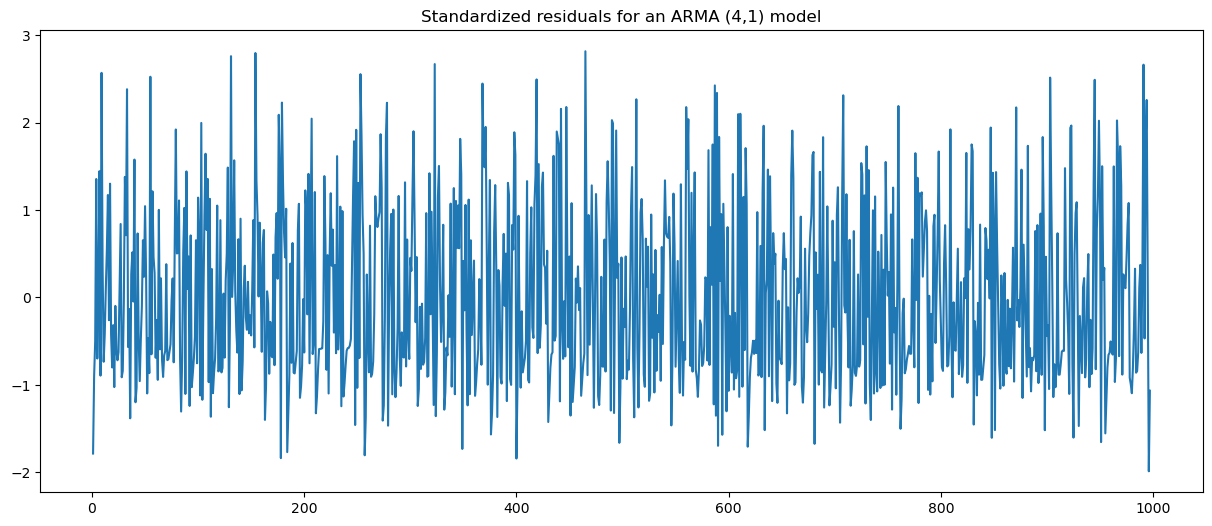

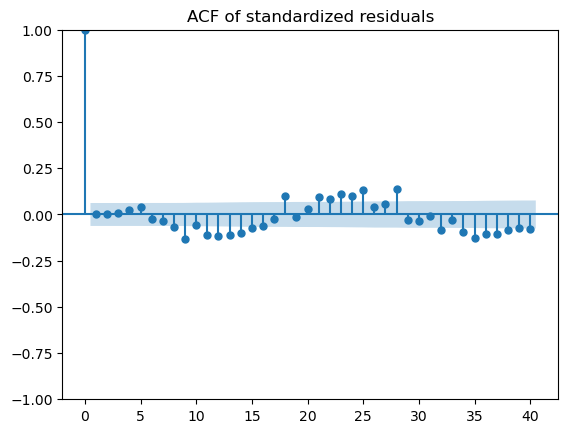

In [33]:
# residuals of model ARMA after training
ARMA_residuals = ARMA_results.resid

# standardized residuals
ARMA_std_residuals = ARMA_residuals / np.std(ARMA_residuals)

#plot
plt.figure(figsize=(15,6))
plt.plot(ARMA_std_residuals)
plt.title('Standardized residuals for an ARMA (4,1) model')


plot_acf(ARMA_std_residuals, lags=40)
plt.title('ACF of standardized residuals')


In [34]:
#Ljung-box to determine the confidence of the non-hypothesis
import statsmodels.api as sm

df= sm.stats.acorr_ljungbox(ARMA_residuals, lags=20)
df1=pd.DataFrame(df,columns=['lb_pvalue'])

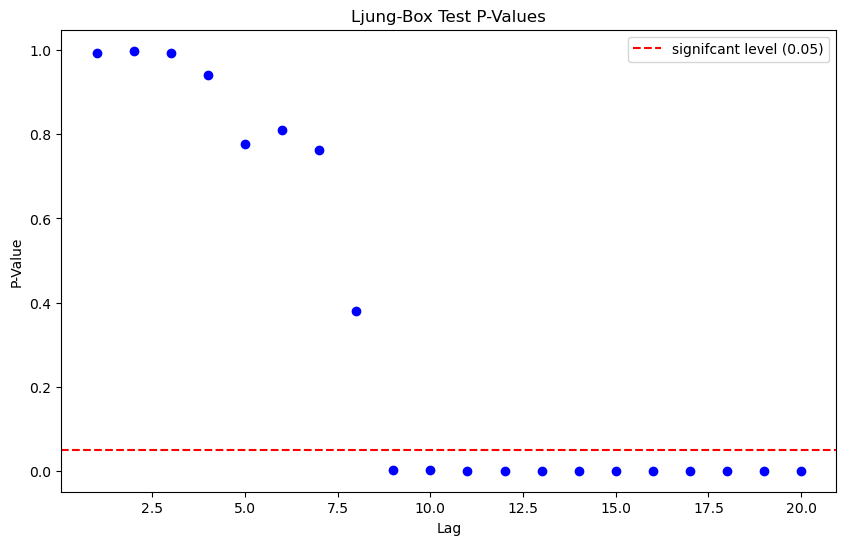

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,21), df1,marker='o', linestyle='', color='b')
plt.axhline(y=0.05, color='r', linestyle='--', label='signifcant level (0.05)')
plt.title('Ljung-Box Test P-Values')
plt.xlabel('Lag')
plt.ylabel('P-Value')
plt.legend()
plt.show()

MODEL GARCH


In [36]:
!pip install arch
from arch import arch_model
import arch
from scipy.stats import chi2 

In [37]:
# train the Garch model
model = arch_model(stationnarized, vol='Garch', p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3102.5718583292314
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3096.4697604109215
Iteration:      3,   Func. Count:     19,   Neg. LLF: 3138.866234087155
Iteration:      4,   Func. Count:     26,   Neg. LLF: 3046.751647480288
Iteration:      5,   Func. Count:     32,   Neg. LLF: 3045.80064364852
Iteration:      6,   Func. Count:     37,   Neg. LLF: 3045.6482087620116
Iteration:      7,   Func. Count:     42,   Neg. LLF: 3045.6355959278185
Iteration:      8,   Func. Count:     47,   Neg. LLF: 3045.635281288602
Iteration:      9,   Func. Count:     52,   Neg. LLF: 3045.635239144791
Iteration:     10,   Func. Count:     57,   Neg. LLF: 3045.635238196295
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3045.635238196295
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10


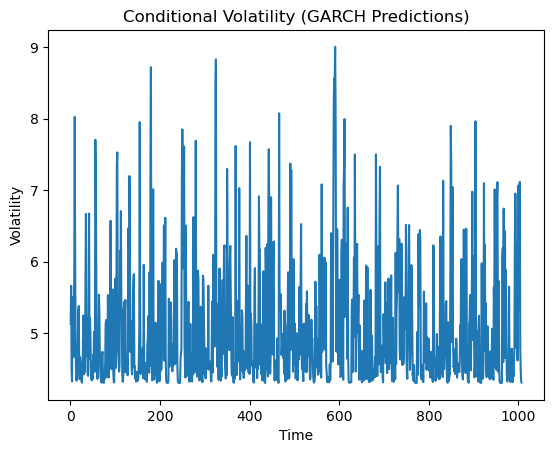

In [38]:
# Garch prediction
forecasts = results.conditional_volatility
plt.plot(forecasts)
plt.title('Conditional Volatility (GARCH Predictions)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.show()

In [39]:
# GARCH summary
model = arch_model(stationnarized, vol='Garch', p=1, q=1)
results = model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3102.5718583292314
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3096.4697604109215
Iteration:      3,   Func. Count:     19,   Neg. LLF: 3138.866234087155
Iteration:      4,   Func. Count:     26,   Neg. LLF: 3046.751647480288
Iteration:      5,   Func. Count:     32,   Neg. LLF: 3045.80064364852
Iteration:      6,   Func. Count:     37,   Neg. LLF: 3045.6482087620116
Iteration:      7,   Func. Count:     42,   Neg. LLF: 3045.6355959278185
Iteration:      8,   Func. Count:     47,   Neg. LLF: 3045.635281288602
Iteration:      9,   Func. Count:     52,   Neg. LLF: 3045.635239144791
Iteration:     10,   Func. Count:     57,   Neg. LLF: 3045.635238196295
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3045.635238196295
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results            

In [40]:
estimated_value = results.params['alpha[1]']
standard_error = results.conditional_volatility

In [41]:
wald_statistic = (estimated_value / standard_error) ** 2
degrees_of_freedom = 1 
p_value = 1 - chi2.cdf(wald_statistic, degrees_of_freedom)
print("Wald Test p-value:", p_value)

Wald Test p-value: [0.96013256 0.96387294 0.95439229 ... 0.95439156 0.95273856 0.95256218]


In [42]:
model = arch.arch_model(stationnarized, vol='Garch', p=0, o=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4358.349648877298
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3512.156453969285
Iteration:      3,   Func. Count:     20,   Neg. LLF: 3232.138314886831
Iteration:      4,   Func. Count:     27,   Neg. LLF: 3065.2367920612974
Iteration:      5,   Func. Count:     32,   Neg. LLF: 3065.1953057286046
Iteration:      6,   Func. Count:     37,   Neg. LLF: 3065.043442176623
Iteration:      7,   Func. Count:     42,   Neg. LLF: 3064.947461094249
Iteration:      8,   Func. Count:     47,   Neg. LLF: 3064.944647914218
Iteration:      9,   Func. Count:     52,   Neg. LLF: 3064.944340397948
Iteration:     10,   Func. Count:     57,   Neg. LLF: 3064.944335652971
Iteration:     11,   Func. Count:     61,   Neg. LLF: 3064.9443356526444
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3064.944335652971
            Iterations: 11
            Function evaluations: 61
            Gradient evaluations:

In [43]:
residuals = results.resid

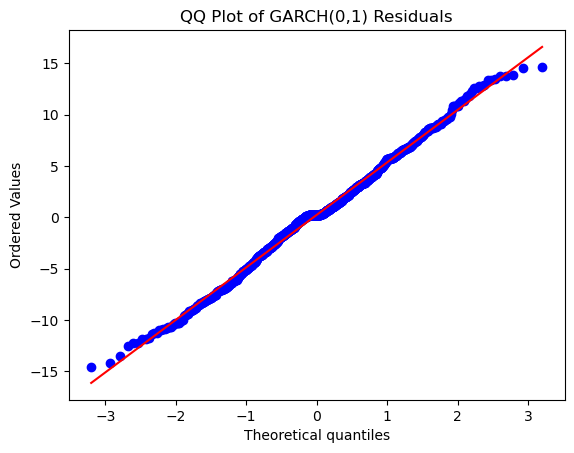

In [44]:
# plot the Q-Q plot of GARCH(0,1)'s residuals 
from scipy import stats
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('QQ Plot of GARCH(0,1) Residuals')
plt.show()